# Using Data to Improve a Marketing Promotion

Megan Holford<br>



For this exercise, we're going to use Dodgers Major League Baseball data from 2012. The data file you will be using is contained in the dodgers.csv file. I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following:

Box plots<br>
Scatter plots<br>
Regression Model

In [1]:
# Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import datetime

<b>Importing the Data</b>


In [2]:


df = pd.read_csv("dodgers.csv")
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


This dataset has information for 81 different Dodgers Games. For this assignment, since we want to determine which attributes increase attendance, we will assume that the data is from home games for the Dodgers.<br>
The attributes in the dataset are:

month : Month of the game (categorical)<br>
day : day of the game (integer)<br>
attend : number in attendance (integer)<br>
day_of_week : Day of the week for the game (categorical)<br>
opponent : The opposing team (categorical)<br>
temp : Temperature (F) (integer)<br>
skies : Weather at the event. Clear/Cloudy (categorical)<br>
day_night : Time of day the game was (day/night) (categorical)<br>
cap : Hats were sold at the game (Yes/No) (categorical)<br>
shirt : Shirts were sold at the game (Yes/No) (categorical)<br>
fireworks : Fireworks were used at the game (Yes/No) (categorical)<br>
bobblehead : Bobbleheads were sold at the game (Yes/No) (categorical)<br>

<b>Exploratory Data Analysis</b>

First, we want to check the breakdown of how many games we can expect throughout the baseball season and how they are distributed between the months.


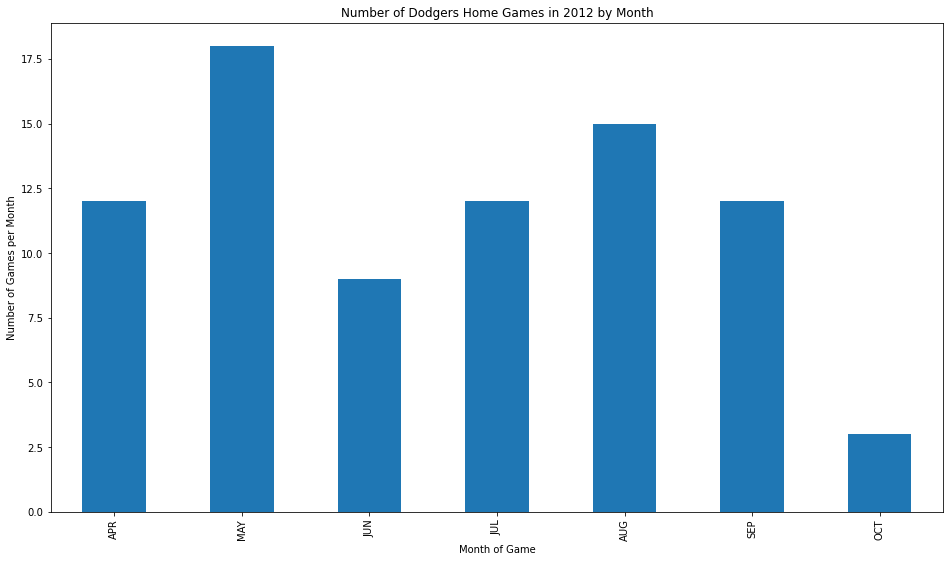

In [3]:
# This will group the games together by month so we can see the distribution.

df.groupby('month').describe()['day']['count'].reindex(
    ['APR','MAY','JUN','JUL','AUG','SEP','OCT']).plot(kind='bar', figsize = (16,9))
plt.xlabel("Month of Game")
plt.ylabel("Number of Games per Month")
plt.title("Number of Dodgers Home Games in 2012 by Month")
plt.show()

This shows us that May has the most games, while October had the least. 


Now we can look at the attendance of each month visually by using a boxplot.


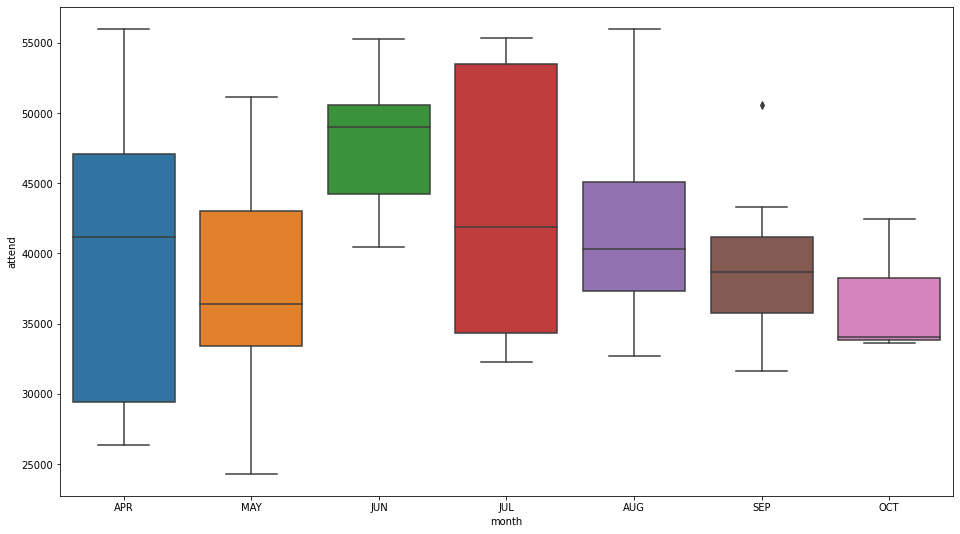

In [4]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['month'], y = df['attend'], order=df['month'].unique())
plt.show()

This graph shows us that June had the highest attendance with the lowest variance of all the games in the month.

Now, we can look even further to see the days of the week that the games were played. 

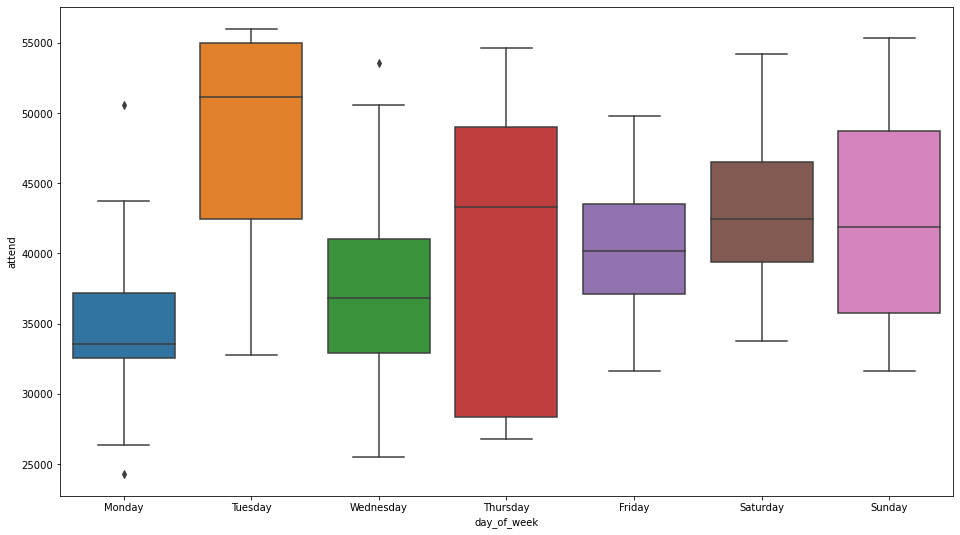

In [5]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['day_of_week'], y = df['attend'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

Tuesdays looks to be the most popular day of the week to attend a game. 

Now, we can also check to see if temperature impacts attendance.


Text(0, 0.5, 'Attenance')

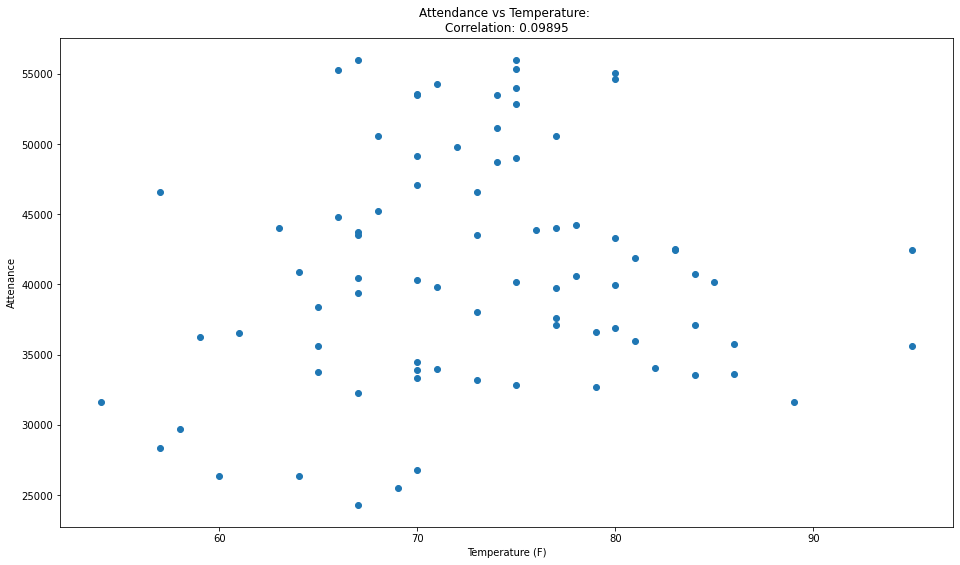

In [6]:
plt.figure(figsize=(16,9))
plt.scatter(df['temp'], df['attend'])
plt.title(f"Attendance vs Temperature: \nCorrelation: {df['temp'].corr(df['attend']):.5f}")
plt.xlabel("Temperature (F)")
plt.ylabel("Attenance")

This scatterplot shows a very low correlation between temperature and attendance. This leads us to believe that the temperature does not really have much of an impact for attendance. 


Now, we can look at the weather condition and if it was clear or cloudy.

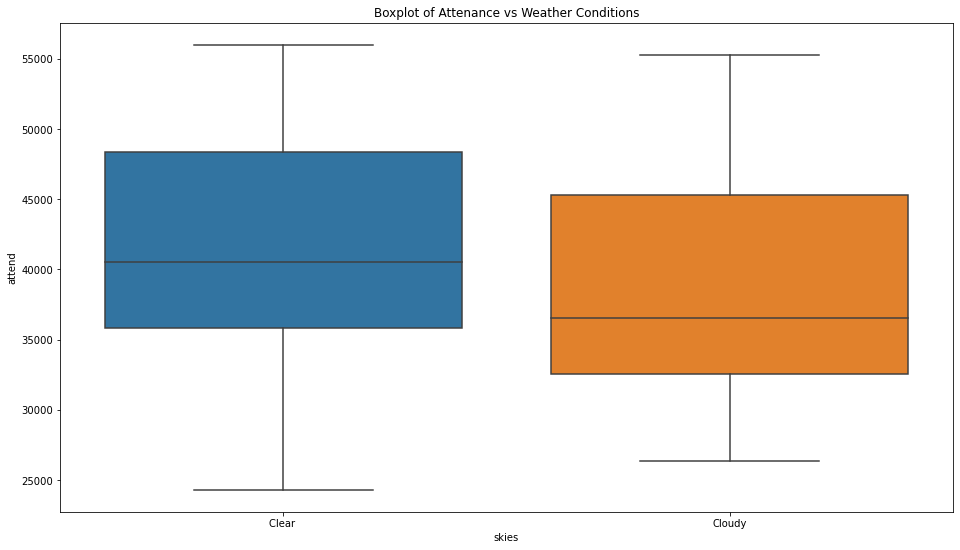

In [7]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['skies'], y = df['attend'], order=df['skies'].unique())
plt.title("Boxplot of Attenance vs Weather Conditions")
plt.show()

Clear days do have a higher average attendance over cloudy days. 

Now, lets look at if the time for the game has an impact.

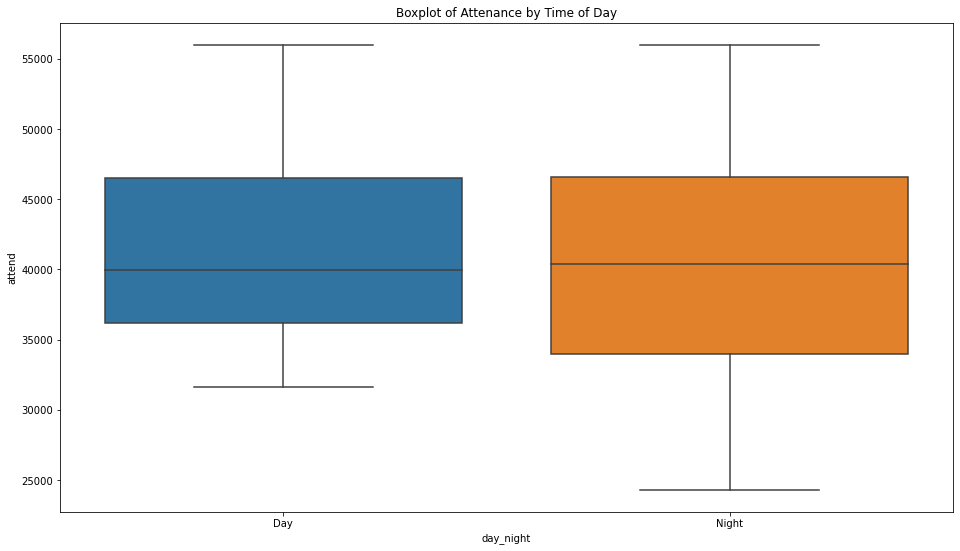

In [8]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['day_night'], y = df['attend'])
plt.title("Boxplot of Attenance by Time of Day")
plt.show()

This shows us that day or night, people will still go to the game. The time does not have much impact.

Now that we have analyzed the things that could impact attendance that are not able to be controlled, lets look at those attributes that can be controlled. Our data has attributes for different things that are sold at the games. We can look at that data to see if any of the items impact attendance. 


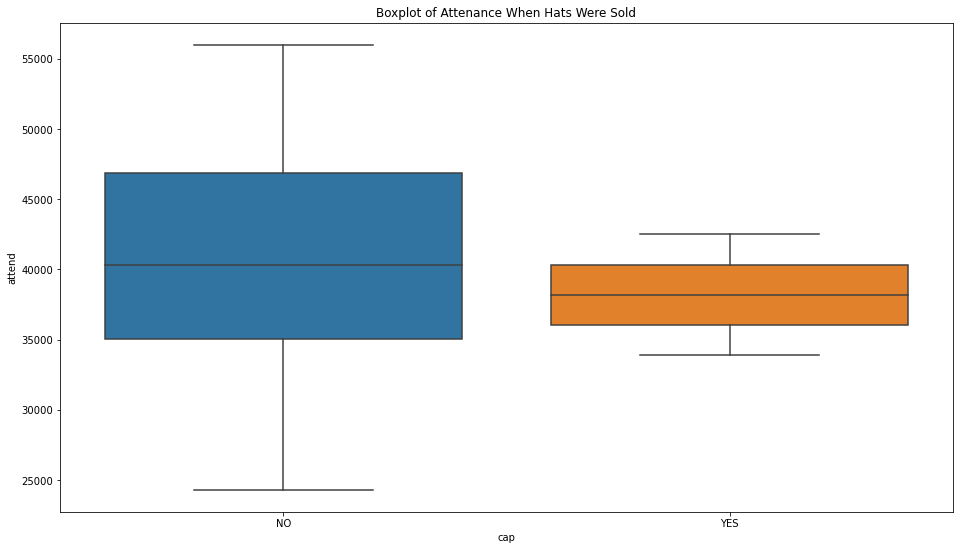

In [9]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['cap'], y = df['attend'])
plt.title("Boxplot of Attenance When Hats Were Sold")
plt.show()

Hats do not seem to really be a big draw at the games. We can see that attendance was lower on average for games where hats were sold.



Now, we can look at fireworks.

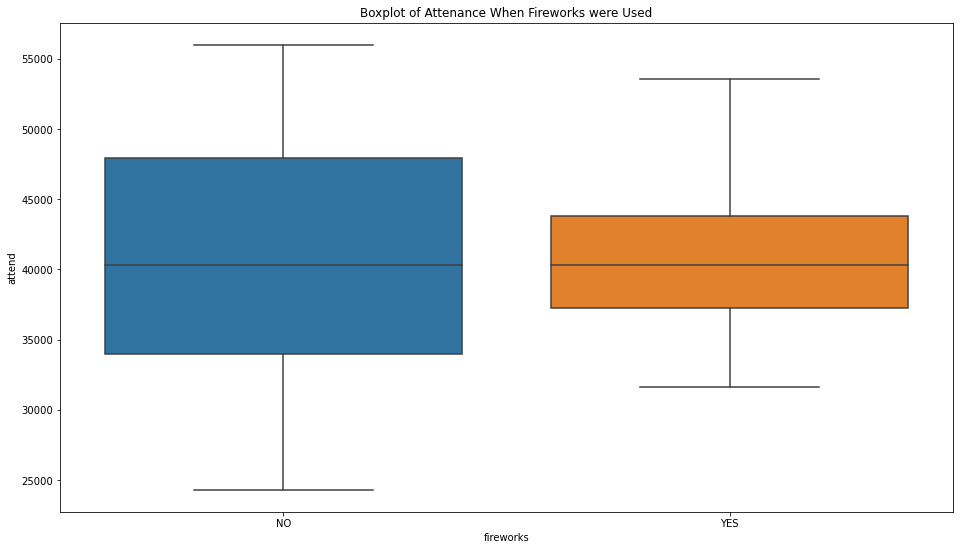

In [10]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['fireworks'], y = df['attend'])
plt.title("Boxplot of Attenance When Fireworks were Used")
plt.show()

There is not much of an impact on attendance if fireworks are presented. 


Next, we can analyze the impact of shirt sales.

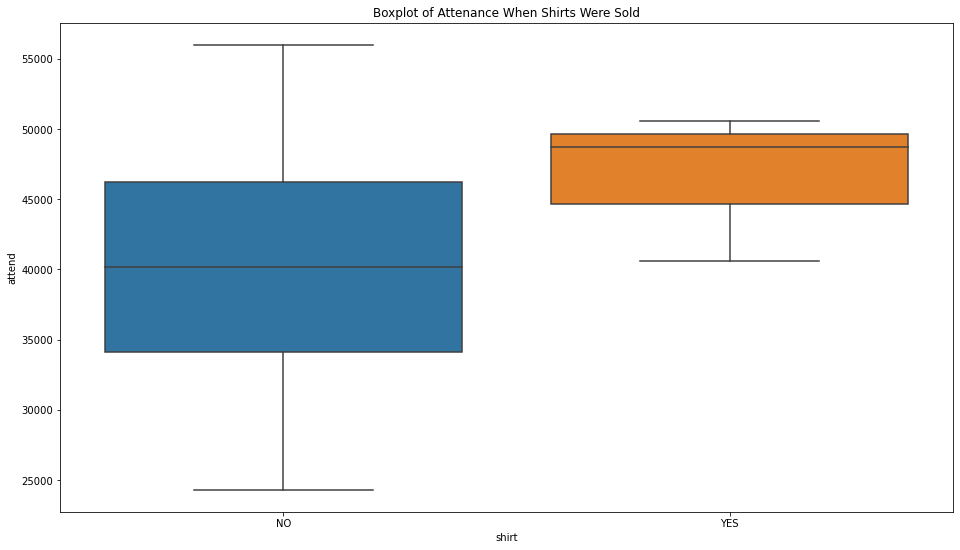

In [11]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['shirt'], y = df['attend'])
plt.title("Boxplot of Attenance When Shirts Were Sold")
plt.show()

This shows us that shirts do have an impact on overall attendance. We can see here that attendance was significantly higher for games where shirts were being sold. 



Lastly, we can see the impact of selling bobbleheads at the games. 


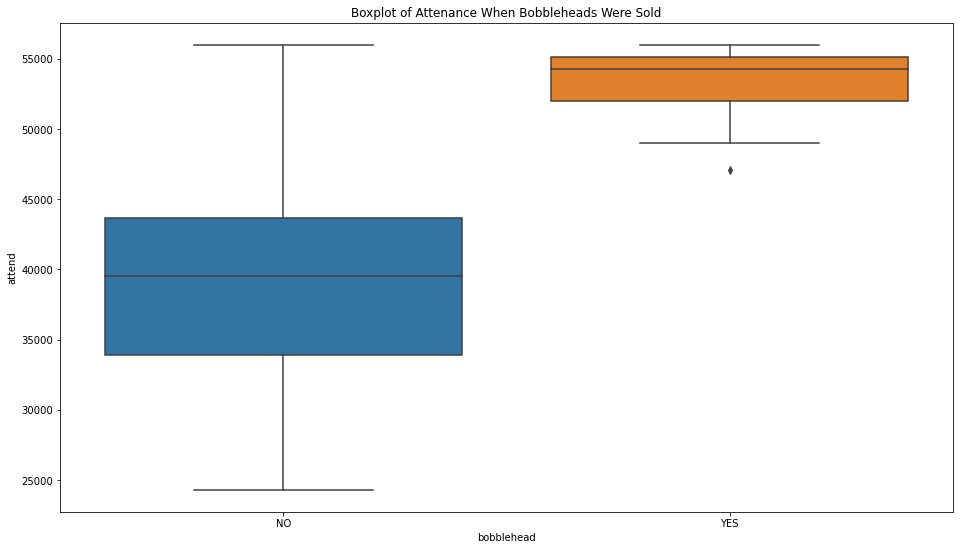

In [12]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['bobblehead'], y = df['attend'])
plt.title("Boxplot of Attenance When Bobbleheads Were Sold")
plt.show()

This shows us that we have a large increase for attendance when bobbleheads are sold. 



<b>Creating a Regression Model</b>

First, we will need to convert the categorical values in our dataframe into dummy variables.


In [13]:
# This will convert our categorical values into indicator variables.

df = pd.get_dummies(df)


Now that all of our values are numeric, we can check the correlations between them. 


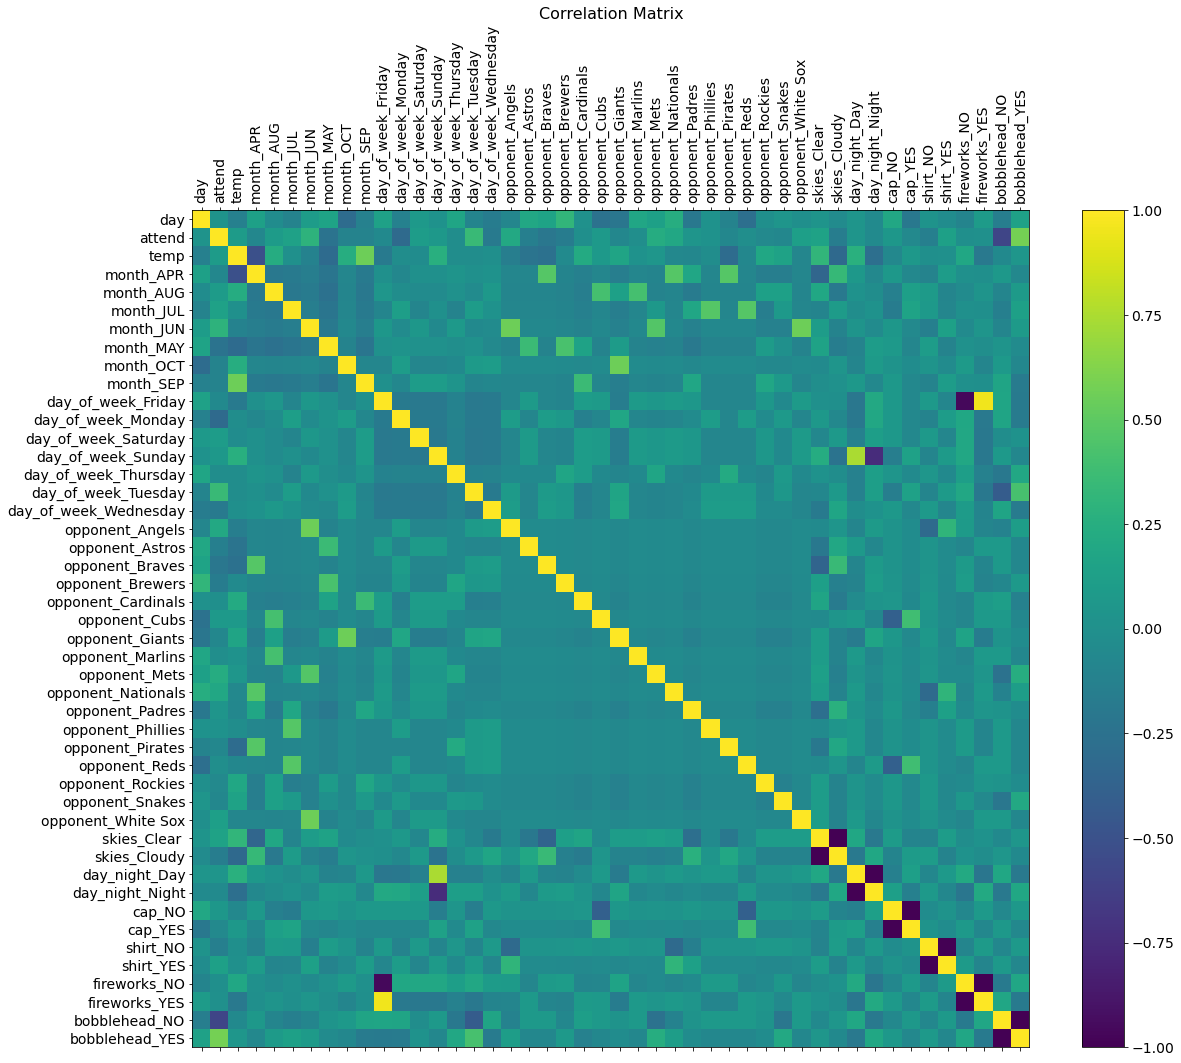

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

With this heatmap, we can see strong correlations between bobbleheads and attenance from this graphic, like our boxplot showed us earlier. This helps to show some of those relationships we explored earlier.

Now, we can work on a linear regression model to find which attributes impact our attenance and how.


In [15]:
import statsmodels.api as sm

df['intercept'] = 1

model = sm.OLS(df['attend'],df[['intercept','shirt_YES', 'cap_YES', 'fireworks_YES', 'bobblehead_YES']])

lm = model.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     12.01
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           1.29e-07
Time:                        04:28:42   Log-Likelihood:                -825.51
No. Observations:                  81   AIC:                             1661.
Df Residuals:                      76   BIC:                             1673.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        3.82e+04    933.092     40.940      0.000    3.63e+04    4.01e+04
shirt_YES       8442.5882   3958.774      2.133      0.036     558.006    1.63e+04
cap_YES          -11.5784   4803.385     -0.002      0.998   -9578.349    9555.193
fireworks_YES   2876.7787   2010.561      1.431      0.157   -1127.600    6881.157
bobblehead_YES  1.494e+04   2215.256      6.746      0.000    1.05e+04    1.94e+04
==============================================================================
Omnibus:                        2.216   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.632
Skew:                           0.329   Prob(JB):                        0.442
Kurtosis:                       3.226   Cond. No.                         6.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion



Looking at the linear regression model, we can see that there are several attributes that impact the attendance. While some of them, like weather, cannot be controlled, we want to look at the variables that can be controlled to find the best attendance to help with putting out a marketing campaign for the games. The attribute that has the most significant p-value is the bobbleheads. For games where bobbleheads are sold, it is a significant factor for increasing attendance. Shirt sales are the second highest significantp-value after bobbleheads. 

Now, if we want to increase attendance, we want to look at the days that have the most chance to be increased. From our earlier boxplots, we could see that out of the days of the week, Tuesdays had the highest attendance with the least variance. If we look at Thursdays, we can see that it also has the potential for high attendance, but it also has the biggest variance out of all the days of the week. 

Since Thursdays have the most potential to have an increased attendance, since the variance is so high, advertising that shirts and bobbleheads are being sold on a Thursday game day could help to draw in attendance as those items do show to bring higher attendance. We can also see that attendance in July also has the possibility for high attendance, but it also has a very high variance. 


The best items to sell at the games are boobleheads and shirts, so advertising to sell bobbleheads and shirts for Thursday games in July could help to boost attendance for those games since they have a high variance for attendance. 

